# TMA4135 Exercise 3:
### Author: Simen Kristiansen Sandhaug 
---

## Table of Contents
- [Problem 1](#1a)
- [Problem 2](#2a)
- [Problem 3](#3a)
- [Problem 4](#4a)

---

## 1a)

To approximate the integral 
$$
I = \int_{\frac{\pi}{6}}^\frac{\pi}{3} \sin(x) \cos(2x) \, dx
$$
using the trapezoidal rule we can divide $[\frac{\pi}{6}, \frac{\pi}{3}]$ into $n$ sub-intervals of width $h = \frac{b-a}{2}$. Then
$$
I_h = \frac{h}{2} \left[ f(a) + f(b) + 2 \sum_{i=1}^{n-1} f(a + i h) \right]
$$
Let's calculate $I_h$

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


In [3]:
def trapezoidal_rule(a, b, f, n):
    h = (b - a) / n
    total = 0.5 * (f(a) + f(b))
    
    x_points = [a]
    y_points = [f(a)]
    
    for i in range(1, n):
        x = a + i * h
        total += f(x)
        
        x_points.append(x)
        y_points.append(f(x))

    x_points.append(b)
    y_points.append(f(b))
    
    return total * h, x_points, y_points

In [4]:
def f(x):
    return np.sin(x) * np.cos(2*x)

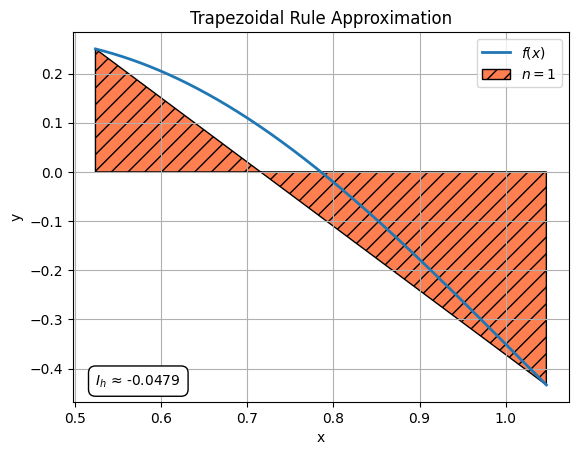

In [5]:
a = pi/6
b = pi/3
n = 1 # Increase the number of trapezoids for a better approximation

integral_approximation, x_points, y_points = trapezoidal_rule(a, b, f, n)

# Plotting the function
x = np.linspace(float(a), float(b), 1000)
plt.plot(x, f(x), linewidth=2, label='$f(x)$')

# Plotting the trapezoids
for i in range(len(x_points) - 1):
    x1, x2 = x_points[i], x_points[i+1]
    y1, y2 = y_points[i], y_points[i+1]
    label = f'$n = {n}$' if i == 0 else None
    plt.fill([x1, x1, x2, x2], [0, y1, y2, 0], facecolor='coral', edgecolor='black', linewidth=1, hatch='//', label=label, zorder=1)
plt.title('Trapezoidal Rule Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.text(a, min(f(x)), f'$I_h$ ≈ {integral_approximation:.4f}', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend()
plt.grid()
plt.show()


Assuming that we are supposed to approximate the integral with $n = 1$
$$
I_h \approx -0.0479
$$

## 1b)
Calculate
$$
E = \| I - I_h \|.
$$

We have to calculate

$$\qquad$$

$$
I = \int_{\frac{\pi}{6}}^\frac{\pi}{3} \sin(x) \cos(2x) \, dx
$$

$$\qquad$$

We can simplify the integrand using the trigonometric identity $\cos(2x) = 2\cos^2(x) - 1$:

$$\qquad$$

$$
\sin(x)\cos(2x) = \sin(x)[2\cos^2(x) - 1] = 2\sin(x)\cos^2(x) - \sin(x)
$$

$$\qquad$$

This breaks the integral into two parts:

$$\qquad$$

$$
I = 2\int_{\frac{\pi}{6}}^{\frac{\pi}{3}} \sin(x)\cos^2(x) \, dx - \int_{\frac{\pi}{6}}^{\frac{\pi}{3}} \sin(x) \, dx
$$

$$\qquad$$

The second integral is trivial to calculate so we focus on the first.
We can use $u$-substitution with $u = \cos(x)$ and $du = -\sin(x) dx$.
This gives a new lower bound $\cos(\frac{\pi}{6}) = \frac{\sqrt{3}}{2}$ and upper bound $\cos(\frac{\pi}{3}) = \frac{1}{2}$

$$\qquad$$

$$
2\int_{\frac{\pi}{6}}^{\frac{\pi}{3}} \sin(x)\cos^2(x) \, dx = -2\int_{\frac{\sqrt{3}}{2}}^{\frac{1}{2}} u^2 \, du
$$

$$\qquad$$

$$
= -2 \left[ \frac{u^3}{3} \right]_{\frac{\sqrt{3}}{2}}^{\frac{1}{2}} = -2 \left(\frac{1}{24} - \frac{\sqrt{3}}{8} \right) \approx 0.34968
$$

$$\qquad$$

$$
0.34968 - \int_{\frac{\pi}{6}}^{\frac{\pi}{3}} \sin(x) \, dx \approx 0.34968 - 0.36603 \approx -0.0163454
$$

$$\qquad$$

Now we can calculate the error $E = | I - I_h|$

$$\qquad$$

$$
E = \| I - I_h \| = \| -0.0163454 - \left(-0.0479\right) \| = \underline{\underline{0.0315546}}
$$


## 1c)

We have that $a = \frac{\pi}{3}$, $b = \frac{\pi}{6}$ and $f(x) = \sin(x)\cos(2x)$

$$\qquad$$

We know that

$$
E = \| I - I_h \| \leq \frac{(b-a)^3}{12} \max_{\xi \in [a, b]} \left| f''(\xi) \right|
$$

Using Python to find this error bound:

In [6]:
import sympy as sp

x = sp.symbols('x')

def f(x):
    return sp.sin(x) * sp.cos(2*x)

# Second derivative
f_double_prime = sp.diff(f(x), x, 2)

# Interval [a, b]
a = sp.pi/6
b = sp.pi/3

# Find the maximum value of the second derivative of f(x) in the interval [a, b]
f_double_prime_values = [f_double_prime.subs(x, a), f_double_prime.subs(x, b)]
f_double_prime_max = max(f_double_prime_values)

# Error estimation
E = (b - a)**3 / 12 * f_double_prime_max

print(f'0.0315546 > {E:.7f}: {0.0315546 > E}')


0.0315546 > 0.0051798: True


## 2a)

In [7]:
psi_values = [
    -1/35 * np.sqrt(525 + 70 * np.sqrt(30)),
    -1/35 * np.sqrt(525 - 70 * np.sqrt(30)),
    1/35 * np.sqrt(525 - 70 * np.sqrt(30)),
    1/35 * np.sqrt(525 + 70 * np.sqrt(30))
]

weights = [
    1/36 * (18 - np.sqrt(30)),
    1/36 * (18 + np.sqrt(30)),
    1/36 * (18 + np.sqrt(30)),
    1/36 * (18 - np.sqrt(30))
]

a, b = -3, 3

Recall that $x(\psi) = \frac{b-a}{2}\psi + \frac{b+a}{2} = 3\psi,$ and $dx = 3d\psi.$

$$
\int_{-3}^{3} e^x \, dx = 3\int_{-1}^{1} f(x(\psi)) \, d\psi \approx 3\sum_{i=0}^{3} w_i f(x(\psi_i))
$$

In [8]:
x_values = [3*psi for psi in psi_values]

def f(x):
    return np.exp(x)

integral_approximation = 3 * sum([weights[i] * f(x_values[i]) for i in range(len(x_values))])

integral_approximation

20.028688395290693

$$
G_h \approx 20.03
$$

## 2b)

The error $ E $ for the Gauss–Legendre quadrature on a single interval is given by:

$$
(1) \qquad E = \frac{(b - a)^{2n + 1} (n!)^4}{(2n + 1) [(2n!)]^3} f^{(2n)}(\xi)
$$

The composite Gauß–Legendre rule divides the interval $[a, b]$ into $m$ subintervals, each of length $h = \frac{b-a}{m}$. For each subinterval, we apply the Gauß–Legendre quadrature rule and sum up the results.

For a single subinterval, the error $E$ is given by Equation (1). For the composite rule, we'll have $m$ such subintervals, and thus $m$ individual errors. If the function $f$ is sufficiently smooth, then the error on each subinterval can be expected to be of the same order of magnitude.

1. **Subinterval Length**: In each subinterval, the length changes from $b - a$ to $h$. So the error $E$ for each subinterval would scale with $h^{2n+1}$.

2. **Summing Errors**: Since there are $m$ subintervals, the composite error $E_m$ would be approximately the sum of the errors over each subinterval, i.e., $m \times E$.

So, for the composite Gauß–Legendre rule, the error $E_m$ could be estimated as follows:

$$
E_m = m \times \left( h^{2n+1} \right) \times \left( \frac{(n!)^4}{(2n + 1) [(2n!)]^3} \right) \times f^{(2n)}(\xi)
$$

Substituting $ h = \frac{b - a}{m} $, the expression for $E_m$ becomes:

$$
E_m = m \times \left( \frac{b - a}{m} \right)^{2n+1} \times \left( \frac{(n!)^4}{(2n + 1) [(2n!)]^3} \right) \times f^{(2n)}(\xi)
$$

$$
E_m = (b - a)^{2n+1} \times \left( \frac{(n!)^4}{m^{2n} (2n + 1) [(2n!)]^3} \right) \times f^{(2n)}(\xi)
$$

This shows that as $m$ increases (i.e., as we use more subintervals), $E_m$ decreases, and it scales down with $m^{2n}$, which indicates that the composite rule becomes more accurate with more subintervals.


## 2c)

### Computing $E_1$ for the Whole Interval $[a, b]$

For the function $ f(x) = \frac{x^8}{8!} , f^{(2n)}(x) = f^{(8)}(x) = 1 $. Therefore, the error $E_1$ for the Gauß–Legendre quadrature on the whole interval $[-3, 3]$ with $n (4)$ points can be given by:

$$
E_1 = \frac{(b - a)^{2n + 1} (n!)^4}{(2n + 1) [(2n!)]^3} f^{(2n)}(\xi)
$$

Substituting $ f^{(2n)}(\xi) = 1 $, $ b - a = 6 $, and $ \xi $ as some point in $[-3, 3]$, we get:

$$
E_1 = \frac{6^{2n + 1} (n!)^4}{(2n + 1) [(2n!)]^3}
$$

Since we have $h = 3, m = 2$
$$
E_2 = \frac{3^{2n + 1} (n!)^4}{2^{2n}(2n + 1) [(2n!)]^3}
$$

$\qquad$

$$
\frac{E_2}{E_1} = \frac{\frac{6^{2n + 1} (n!)^4}{(2n + 1) [(2n!)]^3}}{\frac{3^{2n + 1} (n!)^4}{2^{2n}(2n + 1) [(2n!)]^3}} = 2^{4n+1}
$$



## 3a)

### Derivation of the Composite Simpson's Rule

In the composite Simpson's rule, we divide the interval $[a, b]$ into $m$ segments with $m$ being an even number. Each of these segments will have a length of $h = \frac{b-a}{m}$. The points $x_i$ where the function $f(x)$ is evaluated are defined as $x_i = ih$ for $i = 0, 1, \ldots, m$.

The Simpson's rule for a single interval $[x_{i}, x_{i+2}]$ can be written as:

$$
\int_{x_i}^{x_{i+2}} f(x) dx = \frac{h}{3} \left[ f(x_i) + 4f(x_{i+1}) + f(x_{i+2}) \right]
$$

Now, we apply this formula to all the $m/2$ pairs of intervals: $[x_0, x_2], [x_2, x_4], \ldots, [x_{m-2}, x_m]$.

Summing these up, we get:

$$
\begin{aligned}
S_n &= \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] + \frac{h}{3} \left[ f(x_2) + 4f(x_3) + f(x_4) \right] + \ldots + \frac{h}{3} \left[ f(x_{m-2}) + 4f(x_{m-1}) + f(x_m) \right] \\
&= \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + \ldots + 2f(x_{m-2}) + 4f(x_{m-1}) + f(x_m) \right]
\end{aligned}
$$


## 3b)

In [9]:
# Definition of the Simpson integrating function. Inputs:
#  f: funciton to integrate
#  a: interval start 
#  b: interval end
#  m: number of subintervals
# Outputs:
#  int: value of the integral
def compositeSimpson(f, a, b, m):
    h = (b - a) / m
    s = f(a) + f(b)
    for i in range(1, m):
        s += 2 * f(i*h) if i % 2 == 0 else 4 * f(i*h)
    s *= h / 3
    return s

In [10]:
# Defining the interval boundaries and the funciton to integrate
a=0
b=1
def f(x):
    return np.exp(-x)

In [11]:
#Defining an array with the number of intervals
ms = np.arange(2,10,2)
ms

array([2, 4, 6, 8])

In [12]:
# Exact integral value
I_exact = (-1 + np.e)/np.e

In [13]:
# Array of errors
errs = [np.abs(I_exact - compositeSimpson(f,a,b,m)) for m in ms]
print('Subintervals: ', ms)
print('Errors: ', errs)

Subintervals:  [2 4 6 8]
Errors:  [0.00021312117510496886, 1.361649197462178e-05, 2.700772859354217e-06, 8.55776184471857e-07]


In [14]:
#Estimated convergence order (should be 4 for Simpson's rule)
approxp = [ np.log(errs[i+1]/errs[i]) / (np.log(ms[i]/ms[i+1]))  for i in range(ms.size-1) ]
approxp

[3.9682469683548565, 3.989846955184642, 3.9949808836815652]

## 3c)

Since $f^{(4)}(x) = e^{-x}$ is decreasing in the interval $[0, 1]$ we can say that the max value of the function is $f^{4}(0) = 1$

In [16]:
E_bound = 10e-3
f_4th_max = 1
a, b = 0, 1

h_optimal = ((180 * E_bound) / ((b - a) * f_4th_max)) ** 0.25
m = int(np.ceil((b - a) / h_optimal))

# Make sure m is even
if m % 2 != 0:
    m += 1

error = np.abs(I_exact - compositeSimpson(f,a,b,m)) 
print('Error with the given m: ', error)
print(f'Is less than 10⁻³ = {E_bound}:', error < E_bound)

Error with the given m:  0.00021312117510496886
Is less than 10⁻³ = 0.01: True


## 4a)

The mistake in the code lies in this line
```python
s = ys[0] + ys[-1] + 2*sum(ys[1:-1])
```

The correct line should be
```python
s = (b - a) / (3 * m) * (ys[0] + ys[-1] + 4 * sum(ys[1:-1:2]) + 2 * sum(ys[2:-1:2]))
```

> This will only return $\frac{1}{3}$ for $m \in \{x \in \N \hspace{.1cm}|\hspace{.1cm} x\mod{2} = 0 \}$, not any given m. So the problem statement is confusing

In [21]:
def f(x):
    return x**2
def Method (f,a,b,m) :
    xs = np.linspace(a,b,m+1)
    ys = [f(x) for x in xs]
    s = (b - a) / (3 * m) * (ys[0] + ys[-1] + 4 * sum(ys[1:-1:2]) + 2 * sum(ys[2:-1:2]))
    return s

print(Method(f, 0, 1, 2))
print(Method(f, 0, 1, 4))
print(Method(f, 0, 1, 10))

0.3333333333333333
0.3333333333333333
0.3333333333333333


## 4b)
The method now effectively implements the composite Simpson's rule

How you could change it to the composite trapezoidal rule if that was the intention. Since this will go to $\frac{1}{3}$ as $m \rightarrow \infty$ for *any* m

In [22]:
def f(x):
    return x**2
def Method (f,a,b,m) :
    xs = np.linspace(a,b,m+1)
    ys = [f(x) for x in xs]
    s = (b - a) / (2 * m) * (ys[0] + ys[-1] + 2 * sum(ys[1:-1]))
    return s

print(Method(f, 0, 1, 2))
print(Method(f, 0, 1, 4))
print(Method(f, 0, 1, 10))

0.375
0.34375
0.3350000000000001
